In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nobs = 1000
k =1
Z = np.random.normal(size= (nobs,k))
e = np.random.normal(size= nobs)
X = np.random.normal(size= (nobs,k))
y = X.sum(axis=1) +  Z.sum(axis=1) + e

[[-1.61141915]
 [-1.22264792]
 [-3.00203356]
 [-0.70923598]
 [-1.62030515]
 [-3.12049517]
 [ 1.04393545]
 [ 1.52307591]
 [-1.85914594]
 [ 1.75888862]]


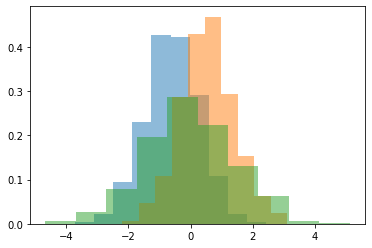

In [3]:
#plt.figure(figsize=(8,8))

m1 = sm.OLS(y,X).fit().predict(X)
m2 = sm.OLS(y,Z).fit().predict(Z)
XZ = np.concatenate( (X,Z ),axis=1)
m3 = sm.OLS(y,XZ).fit().predict(XZ)

set_est = np.concatenate( (m1.reshape(nobs,1),m2.reshape(nobs,1) ),axis=1)
set_est.sort(axis=1)


#print(set_est[ (m3 >= set_est[:,1]) + (m3 <= set_est[:,0])][0:10,:] )
print(m3.reshape(nobs,1)[ (m3 >= set_est[:,1]) + (m3 <= set_est[:,0])][0:10,:] )
#print( ( (m3 >= set_est[:,1]) + (m3 <= set_est[:,0]) ).sum() )
#plt.scatter(set_est[:,0],set_est[:,1])


plt.hist(set_est[:,0],alpha=.5,density=True)
plt.hist(set_est[:,1],alpha=.5,density=True)
plt.hist(m3,alpha=.5,density=True)
plt.show()

m3 the model with x and z fall in the middle because m1 and m2 are additive. when m1 and m2 are both high, m3 will be even higher
one of the models needs to be true... both can't be mispecified...
also, its possible the true parameter could occur on the end points... that's totally an option... impossible to rule out...
if i use enough discrete points, will it converge to a cts set? what about the borders?

In [7]:
w = np.random.normal(size= nobs)
Z = np.random.normal(size= nobs) 
e = np.random.normal(size= nobs)
u = np.random.normal(size= nobs)
X = Z + w**2 + u 
y = X + w**2 + e

part of x is endogenous, part is exogenous...
in this situation, the coefficient on X is not identified... therefore... you would pick a range for beta, and get your set for y that way...

In [8]:
m1 = sm.OLS(y.reshape(nobs),sm.add_constant(X)).fit()
print(y.mean(), m1.predict(sm.add_constant(X)).mean()) #why does X under-predict y?

1.93053813558211 1.9305381355821105


Becomes an issue in a counterfactual... suppose distribution of w changes...

In [9]:
w = np.random.normal(size= nobs)
Z = np.random.normal(size= nobs) 
e = np.random.normal(size= nobs)
u = np.random.normal(size= nobs)
X = Z**2 - w**2 + u 
y = X + w**2 + e

print(y.mean(), m1.predict(sm.add_constant(X)).mean())

1.064828425607222 0.5636189433313898


In [10]:
#try to cover the support of y to come up with a set...
print(y.mean(), sm.add_constant(X).dot([ .1, .1 ] ).mean(), sm.add_constant(X).dot([ 1.5, 1.5 ] ).mean())

1.064828425607222 0.10232162481729298 1.5348243722593946
